# Estimation of Median House Value using Linear Regression

Firstly, import the dataset.

In [1]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This dataset has information on various houses, with a median house value for each as well, which we will have as the label to predict the value of.

In [2]:
df.shape

(20640, 10)

There is therefore information on 20,640 houses, with nine features excluding the target variable (`median_house_value`).

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Immediately, we see an issue with the data; for the `total_bedrooms` column, the value of `count` is only 20,433, indicating that the remaining values are invalid or NaN values. We therefore need to remove all rows containing that invalid data from the set.

In [4]:
df = df.dropna(subset=["total_bedrooms"])
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We now have no more invalid values left. However, there is still one issue; the `ocean_proximity` column has string values rather than numeric, hence we need to convert the values there to numeric form. Firstly, we need to check what values it varies between.

In [5]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

As the output shows, it is a enum-ish string variable which may be one of five values. To make this numeric, the best approach would be to use **one-hot encoding**, which would split this column into five separate ones, where each one is a binary value that represents if that row uses that particular value. Essentially, there would be a row each for `"NEAR BAY"`, `"<1H OCEAN"`, and the three others, each column can have a value of 1 or 0, and when one of them is 1 the rest is 0.

First an attempt will be made at making a unique row for `"NEAR BAY"`.

In [6]:
ocean_proximity_NEAR_BAY = pd.Series([1 if i == "NEAR BAY" else 0 for i in df["ocean_proximity"]])
ocean_proximity_NEAR_BAY.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

We need to check if the values track to what is expected.

In [7]:
ocean_proximity_NEAR_BAY.unique()

array([1, 0])

Everything looks good, we can thus add this new column to the features.

In [8]:
df["ocean_proximity_NEAR_BAY"] = ocean_proximity_NEAR_BAY
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_NEAR_BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0


Similarly, we create similar columns for the remaining 4 values.

In [9]:
ocean_proximity_1HR_OCEAN = pd.Series([1 if i == "<1H OCEAN" else 0 for i in df["ocean_proximity"]])
ocean_proximity_INLAND = pd.Series([1 if i == "INLAND" else 0 for i in df["ocean_proximity"]])
ocean_proximity_NEAR_OCEAN = pd.Series([1 if i == "NEAR OCEAN" else 0 for i in df["ocean_proximity"]])
ocean_proximity_ISLAND = pd.Series([1 if i == "ISLAND" else 0 for i in df["ocean_proximity"]])

df["ocean_proximity_1HR_OCEAN"] = ocean_proximity_1HR_OCEAN
df["ocean_proximity_INLAND"] = ocean_proximity_INLAND
df["ocean_proximity_NEAR_OCEAN"] = ocean_proximity_NEAR_OCEAN
df["ocean_proximity_ISLAND"] = ocean_proximity_ISLAND
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_NEAR_BAY,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR_OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0


Now that we have completed the numerical conversion, we can remove the original `ocean_proximity` column as we do not need it anymore.

In [10]:
df = df.drop("ocean_proximity", axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR_BAY,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR_OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0


In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR_BAY,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR_OCEAN,ocean_proximity_ISLAND
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.111529,0.441220,0.318371,0.128634,0.000247
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.314793,0.496545,0.465856,0.334802,0.015720
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that some new NaN values have been found on the `ocean_proximity` sub columns. We will remove these before moving on.

In [12]:
df = df.dropna(subset=["ocean_proximity_NEAR_BAY", "ocean_proximity_1HR_OCEAN", "ocean_proximity_INLAND", 
                       "ocean_proximity_NEAR_OCEAN", "ocean_proximity_ISLAND"])
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR_BAY,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR_OCEAN,ocean_proximity_ISLAND
count,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000,20228.000000
mean,-119.559944,35.616987,28.679603,2633.266017,537.631699,1423.373294,499.053144,3.873070,207325.175598,0.111529,0.441220,0.318371,0.128634,0.000247
std,2.005949,2.129656,12.603413,2177.797034,420.586318,1129.606307,381.241066,1.900788,115579.393944,0.314793,0.496545,0.465856,0.334802,0.015720
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.750000,280.000000,2.565425,120000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.470000,34.240000,29.000000,2126.000000,435.000000,1166.000000,409.000000,3.538750,179900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.000000,37.700000,37.000000,3139.000000,647.000000,1721.250000,603.000000,4.743775,265500.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, the cleanup has been completed successfully for the dataframe. We can now move on to the actual work.

In [13]:
labels = df["median_house_value"]

## Linear Regression with One Input Feature

For this purpose, we shall use `housing_median_age` as the feature. This is a reasonable choice because how old the house is determines things like wear and tear to the house and the overall quality of all services that it provides, which hugely affect value.

In [14]:
features = df["housing_median_age"]
features.head()

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

Now, we pick the algorithm. Obviously, for the purposes of this lab, we will be making use of **linear regression**. It is quite useful for problems like this because it is simple yet can provide quite usable results for well organized data.

Firstly, we should visualize the data so that we can see what we are working with.

Text(0, 0.5, 'median house value')

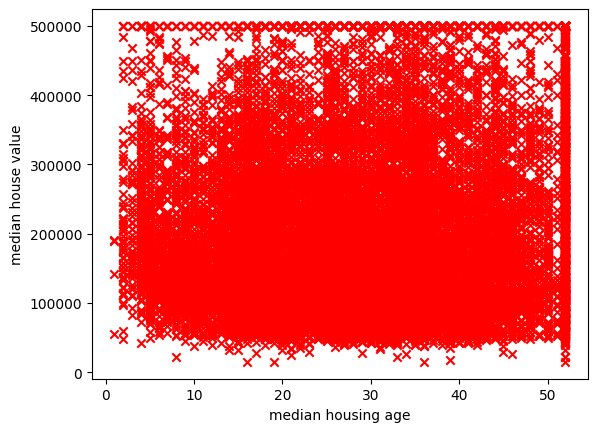

In [15]:
import matplotlib.pyplot as plt

plt.scatter(features, labels, marker='x', color='red')
plt.xlabel("median housing age")
plt.ylabel("median house value")

In [16]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
features_scaled = pd.DataFrame(scaler_x.fit_transform(features.values.reshape(-1,1)))
features_scaled.head()

,0
0,0.977569
1,-0.609342
2,1.850370
3,1.850370
4,1.850370


In [17]:
scaler_y = StandardScaler()
labels_scaled = pd.DataFrame(scaler_y.fit_transform(labels.values.reshape(-1,1)))[0]
labels_scaled.head()

0    2.122185
1    1.308006
2    1.252632
3    1.159187
4    1.166974
Name: 0, dtype: float64

We will now define the cost function. This is the function we need to minimize throughout this task to optimize the model. For this case, we will be using **Mean Squared Error (MSE)**.

In [18]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

We will now compute an initial cost, providing a initial value for `theta` of zero. `theta` specifically is a tuple containing the values of the intercept (bias) and slope (weight) respectively for the model equation `y = b + wx`.

In [19]:
theta_scaled = np.zeros(2)
X_scaled = np.column_stack((np.ones(len(features_scaled)), features_scaled))
y_scaled = labels_scaled
initial_cost = compute_cost(X_scaled, y_scaled, theta_scaled)

print(f"theta: {theta_scaled}")
print(f"cost: {initial_cost}")

theta: [0. 0.]
cost: 0.5


Now, we work towards implementing gradient descent to minimize the cost.

In [20]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

Now, we can train the model using this function.

In [21]:
iterations = 5000
alpha = 0.01

theta = gradient_descent(X_scaled, y_scaled, alpha, iterations)
cost = compute_cost(X_scaled, y_scaled, theta_scaled)

print(f"theta: {theta}")
print(f"cost: {cost}")

theta: [3.18669354e-17 1.07771293e-01]
cost: 0.5


We have minimized the cost to the lowest possible value we could reach with this circumstance, and calculated the intercept as 3.186e-17 and 1.077e-01.

However, these are the scaled values. We need to unscale them to get the true results.

In [23]:
theta = np.zeros(2)
theta[1] = theta[1] * (scaler_y.scale_[0] / scaler_x.scale_[0])
theta[0] = scaler_y.mean_[0] + scaler_y.scale_[0]*theta[0] - theta[1] * scaler_x.mean_[0]
theta

array([207325.17559818,      0.        ])

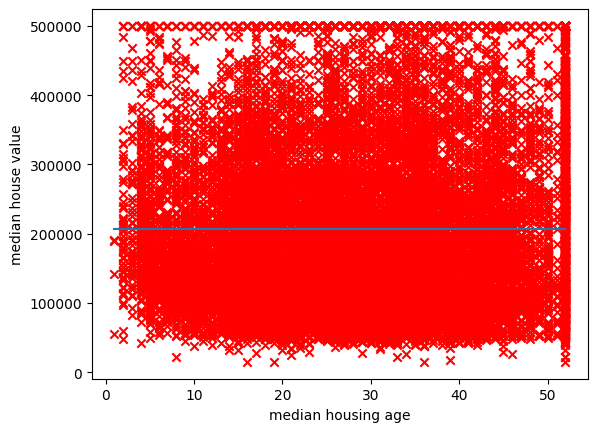

In [24]:
plt.scatter(features, labels, marker='x', color='red')
plt.xlabel("median housing age")
plt.ylabel("median house value")
samples = np.linspace(min(features), max(features))
plt.plot(samples, theta[0] + theta[1] * samples)

## Linear Regression with Multiple Input Features

Now, we will use all the input features available.

In [25]:
features = df[df.columns.difference(["median_house_value"])]
features.head()

,households,housing_median_age,latitude,longitude,median_income,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN,population,total_bedrooms,total_rooms
0,126.0,41.0,37.88,-122.23,8.3252,0.0,0.0,0.0,1.0,0.0,322.0,129.0,880.0
1,1138.0,21.0,37.86,-122.22,8.3014,0.0,0.0,0.0,1.0,0.0,2401.0,1106.0,7099.0
2,177.0,52.0,37.85,-122.24,7.2574,0.0,0.0,0.0,1.0,0.0,496.0,190.0,1467.0
3,219.0,52.0,37.85,-122.25,5.6431,0.0,0.0,0.0,1.0,0.0,558.0,235.0,1274.0
4,259.0,52.0,37.85,-122.25,3.8462,0.0,0.0,0.0,1.0,0.0,565.0,280.0,1627.0


Now, we apply the standard scaler on all the features.

In [26]:
x = features
y = labels

In [27]:
scaler = StandardScaler()

standardized_data = pd.DataFrame(scaler.fit_transform(x), columns=["households", "housing_median_age", "latitude", "longitude",
                                                                   "median_income", "population", "total_bedrooms", "total_rooms",
                                                                   "ocean_proximity_NEAR_BAY", "ocean_proximity_1HR_OCEAN",
                                                                   "ocean_proximity_INLAND", "ocean_proximity_NEAR_OCEAN",
                                                                   "ocean_proximity_ISLAND"])
standardized_data.head()

,households,housing_median_age,latitude,longitude,median_income,population,total_bedrooms,total_rooms,ocean_proximity_NEAR_BAY,ocean_proximity_1HR_OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR_OCEAN,ocean_proximity_ISLAND
0,-0.978547,0.977569,1.062645,-1.331102,2.342313,-0.888602,-0.683427,-0.015724,2.822466,-0.384217,-0.975030,-0.971600,-0.805084
1,1.676007,-0.609342,1.053254,-1.326117,2.329792,-0.888602,-0.683427,-0.015724,2.822466,-0.384217,0.865479,1.351405,2.050625
2,-0.844770,1.850370,1.048558,-1.336087,1.780532,-0.888602,-0.683427,-0.015724,2.822466,-0.384217,-0.820991,-0.826561,-0.535539
3,-0.734601,1.850370,1.048558,-1.341073,0.931232,-0.888602,-0.683427,-0.015724,2.822466,-0.384217,-0.766103,-0.719565,-0.624163
4,-0.629678,1.850370,1.048558,-1.341073,-0.014136,-0.888602,-0.683427,-0.015724,2.822466,-0.384217,-0.759906,-0.612569,-0.462068


We can modify the earlier gradient descent function to expand to multiple features and work with it to now use linear regression with the selected features.

In [32]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

alpha = 0.1
iterations = 5000
theta = gradient_descent_multi(standardized_data, labels_scaled, theta, alpha, iterations)
cost = compute_cost(standardized_data, labels_scaled, theta)

print(f"theta: \n{theta}")
print(f"cost: {cost}")

theta: 
households                    0.160967
housing_median_age            0.121329
latitude                     -0.694723
longitude                    -0.681352
median_income                 0.649095
population                    0.050145
total_bedrooms               -0.048032
total_rooms                  -0.003173
ocean_proximity_NEAR_BAY     -0.004888
ocean_proximity_1HR_OCEAN    -0.002792
ocean_proximity_INLAND       -0.388327
ocean_proximity_NEAR_OCEAN    0.382945
ocean_proximity_ISLAND       -0.112391
dtype: float64
cost: 0.1788545988518347


Thus, we get the cost as 0.178.